<a href="https://colab.research.google.com/github/kmontero3/RedsHackathon/blob/main/StarterToReliever.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
import numpy as np
import scipy.stats as stats
drive.mount('/content/drive')
fangraphs = pd.read_csv('/content/drive/My Drive/RedsHackathon/fangraphs_season_level.csv')
savant = pd.read_csv('/content/drive/My Drive/RedsHackathon/savant_pitch_level.csv')

Mounted at /content/drive


In [48]:
# Separate the DataFrame into SP and RP and filter for a "qualifying full season"
sp_fangraphs = fangraphs[fangraphs['Role'] == 'SP']
rp_fangraphs = fangraphs[fangraphs['Role'] == 'RP']

# Initialize an empty DataFrame to store the top 150 starting pitchers for each year
top_sp_pitchers = pd.DataFrame()
top_rp_pitchers = pd.DataFrame()

# Iterate through each year (assuming you have data for 2021, 2022, and 2023)
for year in [2021, 2022, 2023]:
    # Filter the data for the current year
    sp_year_data = sp_fangraphs[sp_fangraphs['Season'] == year]
    rp_year_data = rp_fangraphs[rp_fangraphs['Season'] == year]


    # Sort the data by innings pitched in descending order
    sp_year_data = sp_year_data.sort_values(by='IP', ascending=False)
    rp_year_data = rp_year_data.sort_values(by='IP', ascending=False)

    # Select the top 150 starting pitchers for the current year
    top_sp_year = sp_year_data.head(150)
    top_rp_year = rp_year_data.head(150)


    # Append the filtered DataFrame to the 'top_sp_pitchers' DataFrame
    top_sp_pitchers = top_sp_pitchers.append(top_sp_year)
    top_rp_pitchers = top_rp_pitchers.append(top_rp_year)

pitchers = pd.concat([top_sp_pitchers, top_rp_pitchers])

#Ensure Season is an int in both DataFrames
savant['game_date'] = pd.to_datetime(savant['game_date'])
savant['Season'] = savant['game_date'].dt.year.astype(int)
pitchers['Season'] = pitchers['Season'].astype(int)

#Group and calculate 'woba_diff' in 'savant'
savant_grouped = savant.groupby(['pitcher', 'Season', 'stand'])['woba_value'].mean().unstack()
savant_grouped['wOBA_Platoon_split'] = (savant_grouped['L'] - savant_grouped['R']).abs()
savant_grouped = savant_grouped.reset_index()
# Merge the data based on the consistent name and season
pitchers = pitchers.merge(savant_grouped[['pitcher', 'Season', 'wOBA_Platoon_split']], left_on=['MLBAMID', 'Season' ], right_on=['pitcher', 'Season'], how='left')

# Drop the extra 'pitcher' column from the merge if you don't need it
pitchers.drop(columns='pitcher', inplace=True)

#metrics to measure
selected_columns = ['Name', 'MLBAMID', 'tERA', 'FIP', 'xFIP', 'Stuff_plus','BABIP','IP', 'Season', 'Role', 'ERA', 'botCmd', 'Location_plus', 'BB_pct','K_pct',
                    'FA_pct_sc','FC_pct_sc','FS_pct_sc','FO_pct_sc','SI_pct_sc','SL_pct_sc','CU_pct_sc','KC_pct_sc','EP_pct_sc','CH_pct_sc','SC_pct_sc','KN_pct_sc',
                    'wFA_sc','wFC_sc','wFS_sc','wFO_sc','wSI_sc','wSL_sc','wCU_sc','wKC_sc','wEP_sc','wCH_sc','wSC_sc','wKN_sc','wOBA_Platoon_split']


# Group data by 'Role' and calculate mean for each Role
metrics = ['FStrike_pct', 'LOB_pct', 'ERA', 'K_pct', 'BB_pct', 'AVG', 'WHIP', 'BABIP', 'FIP',
           'xFIP', 'WPA', 'OSwing_pct', 'ZSwing_pct', 'Swing_pct', 'ZContact_pct', 'Zone_pct', 'SwStr_pct',
           'CStr_pct', 'CSW_pct', 'ERA_minus', 'Soft_pct', 'Hard_pct', 'EV', 'LA', 'Barrel_pct', 'HardHit_pct',
           'ZSwing_pct_sc', 'OContact_pct_sc', 'Stuff_plus', 'Location_plus','Pitching_plus','tERA','wOBA_Platoon_split']

grouped_data = pitchers.groupby('Role')[metrics].mean()


avgmetrics = ['Role','IP']
grouped_data_avg = pitchers.groupby('Role')[avgmetrics].mean()
avg_RP_IP = grouped_data_avg.loc['RP', 'IP']
avg_SP_IP = grouped_data_avg.loc['SP', 'IP']
avg_SP_woba_plat_split = grouped_data.loc['SP', 'wOBA_Platoon_split']
avg_SP_location_plus = grouped_data.loc['SP', 'Location_plus']
avg_SP_stuff_plus = grouped_data.loc['SP', 'Stuff_plus']
avg_SP_K_pct = grouped_data.loc['SP', 'K_pct']
avg_SP_BB_pct = grouped_data.loc['SP', 'BB_pct']

# Display the average values for each role
print("Average values for each role:")
print(avg_RP_IP)
print(avg_SP_IP)
print(avg_SP_woba_plat_split)
print(avg_SP_location_plus)
print(avg_SP_stuff_plus)
print(avg_SP_K_pct)
print(avg_SP_BB_pct)


<ipython-input-48-95cdd132c7e0>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_sp_pitchers = top_sp_pitchers.append(top_sp_year)
<ipython-input-48-95cdd132c7e0>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_rp_pitchers = top_rp_pitchers.append(top_rp_year)
<ipython-input-48-95cdd132c7e0>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_sp_pitchers = top_sp_pitchers.append(top_sp_year)
<ipython-input-48-95cdd132c7e0>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top_rp_pitchers = top_rp_pitchers.append(top_rp_year)
<ipython-input-48-95cdd132c7e0>:26: FutureWarning: The frame.append method is deprecated and will be

Average values for each role:
61.12022222222222
135.32822222222222
0.045316502377739556
101.24000019513335
97.71366790324444
0.22529
0.07504822222222222


<ipython-input-48-95cdd132c7e0>:62: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data_avg = pitchers.groupby('Role')[avgmetrics].mean()


In [56]:
# Find starting pitchers(SP) with Innings Pitched(IP) less than average SP but greater than RP Average IP, Stuff_plus greater than average SP, Location_Plus ...
# less than average SP, Strikeout percent greater than average RP, Walk percent greater than average SP. NOTE: these averages were calculated in cell above
sp_pitchers = fangraphs[(fangraphs['Role'] == 'SP') & (fangraphs['IP'] < avg_SP_IP) & (fangraphs['IP'] > avg_RP_IP) & (fangraphs['Stuff_plus'] > avg_SP_stuff_plus) & (fangraphs['Location_plus'] < avg_SP_location_plus)
 & (fangraphs['K_pct'] >= avg_SP_K_pct) & (fangraphs['BB_pct'] >= avg_SP_BB_pct)]
# Define the columns to display and calculate averages
selected_columns = [
    'NameASCII', 'MLBAMID', 'Stuff_plus', 'K_pct', 'tERA', 'FIP', 'xFIP',
    'BABIP', 'IP', 'Role', 'ERA', 'botCmd', 'Location_plus', 'BB_pct']

# Group by pitcher's name and season and calculate the average for each of the selected columns
average_stats_all_seasons = sp_pitchers.groupby(['NameASCII', 'Season'])[selected_columns].mean().reset_index()
# Sort the pitchers by 'Stuff_plus' in the averaged data
sorted_average_stats = average_stats_all_seasons.sort_values(by='Stuff_plus', ascending=False)
# print(sorted_average_stats)
pitcher_stats = savant[['pitcher','pitch_type','stand','woba_value','on_3b','on_2b','on_1b','inning','outs_when_up','events', 'role_key']]

#clean data
pitcher_stats = pitcher_stats.dropna(subset=['woba_value', 'events'])

# Calculate average wOBA for R and L batters faced, calculate the difference in averages, then sort for difference in average wOBA
avg_woba = pitcher_stats.pivot_table(index=['pitcher'], columns='stand', values='woba_value', aggfunc=np.mean, fill_value=0)
avg_woba['wOBA_Platoon_split'] = abs(avg_woba['L'] - avg_woba['R'])
avg_woba_sorted = avg_woba.sort_values(by='wOBA_Platoon_split', key=abs, ascending=False).reset_index()

#Merge the Baseball Savant data with the Fangraphs Data
merged_df = pd.merge(sorted_average_stats, avg_woba_sorted, left_on='MLBAMID', right_on='pitcher', how='inner')
merged_df_sorted = merged_df.sort_values(by='wOBA_Platoon_split', key=abs, ascending=False).reset_index()
#filter data set as to keep pitchers with a woba_diff greater than or equal to average RP woba_diff
mdf=merged_df_sorted[merged_df_sorted['wOBA_Platoon_split']>=.053]
mdf


<ipython-input-56-54583f0884c8>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_stats_all_seasons = sp_pitchers.groupby(['NameASCII', 'Season'])[selected_columns].mean().reset_index()


,index,NameASCII,Season,MLBAMID,Stuff_plus,K_pct,tERA,FIP,xFIP,BABIP,IP,ERA,botCmd,Location_plus,BB_pct,pitcher,L,R,wOBA_Platoon_split
0,17,Nick Lodolo,2022,666157.0,105.867304,0.2971,4.238715,3.896303,3.492872,0.322176,103.1,3.658076,53.146078,97.518410,0.0884,666157,0.223418,0.376231,0.152813
1,25,Gavin Williams,2023,668909.0,102.318484,0.2348,4.372888,4.047723,4.533597,0.269767,82.0,3.292683,54.666828,100.098339,0.1072,668909,0.359066,0.245399,0.113667
2,12,Taj Bradley,2023,671737.0,110.094501,0.2844,4.538162,4.716074,3.798437,0.307692,102.2,5.522709,53.098655,100.730303,0.0867,671737,0.300217,0.409130,0.108913
3,18,Yusei Kikuchi,2022,579328.0,104.945053,0.2453,5.795848,5.942391,4.470712,0.278049,82.1,5.246966,47.590576,93.684894,0.1321,579328,0.262694,0.360779,0.098085
4,8,Trevor Bauer,2021,545333.0,117.790539,0.3171,3.908188,4.033805,3.689770,0.220339,107.2,2.591323,52.171063,99.360180,0.0856,545333,0.329147,0.252045,0.077101
5,20,Edward Cabrera,2023,665795.0,103.046683,0.2638,4.005869,4.419875,4.263114,0.298643,91.0,4.450549,46.078942,96.925746,0.1457,665795,0.280184,0.357246,0.077062
6,19,Edward Cabrera,2022,665795.0,104.787654,0.2577,4.622293,4.591499,4.120211,0.207317,71.2,3.013952,43.172545,94.992675,0.1134,665795,0.280184,0.357246,0.077062
7,29,Alek Manoah,2021,666201.0,100.380792,0.2767,4.136731,3.796894,4.169505,0.246212,111.2,3.223871,47.689948,98.648237,0.0871,666201,0.332983,0.259748,0.073235
8,9,Cristian Javier,2022,664299.0,116.051268,0.3258,2.989269,3.268758,3.604819,0.224913,134.1,2.679908,52.311673,100.890417,0.0923,664299,0.319021,0.264835,0.054185


In [ ]:
#function to display pie chart for a pitcher's pitch percentages
def plot_pitcher_pitch_usage(df, player_name, season):
    # Filter DataFrame for the specified player and season
    pitcher_data = df[(df['Name'] == player_name) & (df['Season'] == season)]

    # Check if pitcher data is empty
    if pitcher_data.empty:
        print(f"No data found for {player_name} in {season}.")
        return

    # Define the pitch percentage columns and corresponding labels
    pitch_pct_columns = ['FA_pct_sc', 'FC_pct_sc', 'FS_pct_sc', 'FO_pct_sc', 'SI_pct_sc', 'SL_pct_sc',
                         'CU_pct_sc', 'KC_pct_sc', 'EP_pct_sc', 'CH_pct_sc', 'SC_pct_sc', 'KN_pct_sc']
    pitch_labels = ['Fastball', 'Cutter', 'Split-Finger', 'Forkball', 'Sinker', 'Slider',
                    'Curveball', 'Knuckle-Curve', 'Eephus', 'Changeup', 'Screwball', 'Knuckleball']

    # Select the first row if multiple entries exist for the specified season
    pitcher_data_row = pitcher_data.iloc[0]

    # Filter out NaN values and pitches with 0% usage
    pitch_percentages = [pitcher_data_row[col] for col in pitch_pct_columns if not pd.isna(pitcher_data_row[col]) and pitcher_data_row[col] > 0]
    filtered_labels = [label for label, col in zip(pitch_labels, pitch_pct_columns) if not pd.isna(pitcher_data_row[col]) and pitcher_data_row[col] > 0]

    # Plotting
    if pitch_percentages:  # Check if there's any data to plot
        plt.figure(figsize=(10, 8))
        plt.pie(pitch_percentages, labels=filtered_labels,colors=plt.cm.tab10.colors, autopct='%1.1f%%', startangle=140)
        plt.title(f'Pitch Usage for {player_name}, {season}')
        plt.show()
    else:
        print(f"No pitch usage data available for {player_name} in {season}.")

plot_pitcher_pitch_usage(sp_pitchers, 'Edward Cabrera', 2023)
plot_pitcher_pitch_usage(sp_pitchers, 'Taj Bradley', 2023)

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_pitcher_pitch_usage(df, player_name, season):
    # Filter DataFrame for the specified player and season
    pitcher_data = df[(df['Name'] == player_name) & (df['Season'] == season)]

    # Check if pitcher data is empty
    if pitcher_data.empty:
        print(f"No data found for {player_name} in {season}.")
        return

    # Define the pitch percentage columns, corresponding labels, and value columns
    pitch_pct_columns = ['FA_pct_sc', 'FC_pct_sc', 'FS_pct_sc', 'FO_pct_sc', 'SI_pct_sc', 'SL_pct_sc',
                         'CU_pct_sc', 'KC_pct_sc', 'CH_pct_sc']
    pitch_value_columns = ['Stf_plus_FA', 'Stf_plus_FC', 'Stf_plus_FS','Stf_plus_FO', 'Stf_plus_SI', 'Stf_plus_SL', 'Stf_plus_CU', 'Stf_plus_KC', 'Stf_plus_CH']
    pitch_labels = ['Fastball', 'Cutter', 'Split-Finger', 'Forkball', 'Sinker', 'Slider',
                    'Curveball', 'Knuckle-Curve', 'Changeup']

    # Select the first row if multiple entries exist for the specified season
    pitcher_data_row = pitcher_data.iloc[0]

    # Filter out NaN values and pitches with 0% usage, also get corresponding pitch values
    pitch_percentages = []
    pitch_values = []
    filtered_labels = []
    for pct_col, val_col, label in zip(pitch_pct_columns, pitch_value_columns, pitch_labels):
        if not pd.isna(pitcher_data_row[pct_col]) and pitcher_data_row[pct_col] > 0:
            pitch_percentages.append(pitcher_data_row[pct_col])
            pitch_values.append(pitcher_data_row[val_col])  # Corresponding pitch value
            filtered_labels.append(f"{label} ({pitcher_data_row[val_col]:.2f})")  # Include pitch value in label

    # Plotting
    if pitch_percentages:  # Check if there's any data to plot
        plt.figure(figsize=(10, 8))
        plt.pie(pitch_percentages, labels=filtered_labels, colors=plt.cm.tab10.colors, autopct='%1.1f%%', startangle=140)
        plt.title(f'Pitch Usage and Value for {player_name}, {season}')
        plt.show()
    else:
        print(f"No pitch usage data available for {player_name} in {season}.")

# Example usage:
plot_pitcher_pitch_usage(sp_pitchers, 'Edward Cabrera', 2023)
plot_pitcher_pitch_usage(sp_pitchers, 'Taj Bradley', 2023)



Slope: -0.02


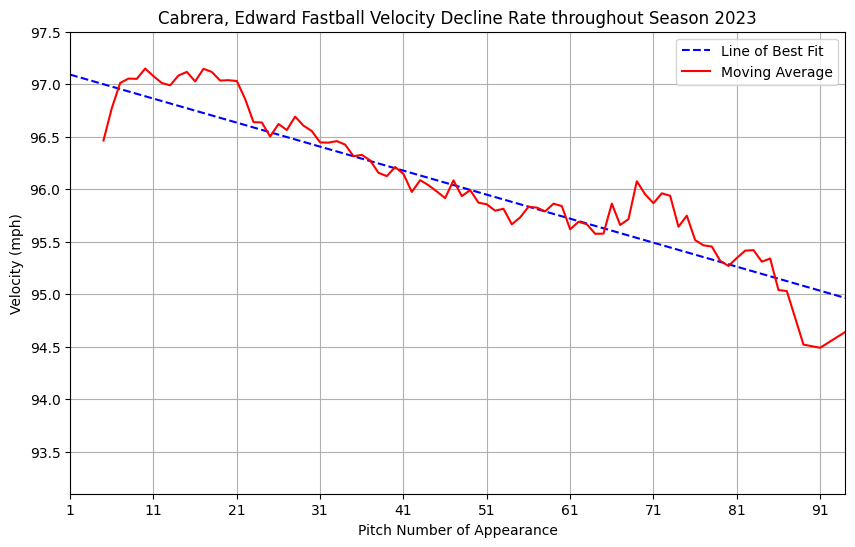

In [59]:
def plot_velocity_decline_rate(df, pitcher_name, season, window_size=10, threshold=1):
    df = df[df['pitch_type']=='FF']
    average_release_speed_by_pitch_number = df.groupby(['player_name', 'pitch_number_appearance', 'Season'])['release_speed'].mean().reset_index()

    # Filter for the specific pitcher and season
    filtered_fb_velo = average_release_speed_by_pitch_number[(average_release_speed_by_pitch_number['Season'] == str(season)) & (average_release_speed_by_pitch_number['player_name'] == pitcher_name)]

    pitcher_x = filtered_fb_velo['pitch_number_appearance'].values
    pitcher_y = filtered_fb_velo['release_speed'].values

    # Check if there is data to plot
    if len(pitcher_x) == 0 or len(pitcher_y) == 0:
        print(f"No data found for {pitcher_name} in season {season}.")
        return

    # Moving average of the velocities
    moving_avg = pd.Series(pitcher_y).rolling(window=window_size).mean().values

    # Identify "fall off" points where velocity is below the moving average by a certain threshold
    fall_off_points = np.where((pitcher_y < (moving_avg - threshold)) & (np.isfinite(moving_avg)))[0]

    # Fit a 1st degree polynomial (line) to the data for the line of best fit
    fit = np.polyfit(pitcher_x, pitcher_y, 1)
    fit_fn = np.poly1d(fit)

    # Print the slope of the line of best fit
    print(f"Slope:{fit[0]:.2f}")

    # Create a line plot to visualize the velocity decline rate
    plt.figure(figsize=(10, 6))
    plt.plot(pitcher_x, pitcher_y, linestyle='-', color='r', label=f'{pitcher_name} Velocity')
    plt.plot(pitcher_x, moving_avg, linestyle='-', color='orange', label='Moving Average')
    plt.plot(pitcher_x, fit_fn(pitcher_x), linestyle='--', color='b', label='Line of Best Fit')

    # Highlight "fall off" points
    if len(fall_off_points) > 0:
        plt.scatter(pitcher_x[fall_off_points], pitcher_y[fall_off_points], color='black', label='Fall Off Points')

    # Add labels and title
    plt.xlabel('Pitch Number of Appearance')
    plt.ylabel('Velocity (mph)')
    plt.title(f'{pitcher_name} Fastball Velocity Decline Rate throughout Season {season}')
    plt.grid(True)
    plt.xlim(1, max(pitcher_x))
    plt.ylim(min(pitcher_y), max(pitcher_y))

    # Adjusted to go from 1 to the maximum pitch number appearance
    xticks = np.arange(1, max(pitcher_x) + 1, 10)

    # Create labels for each tick
    xticklabels = [str(int(x)) for x in xticks]

    plt.xticks(xticks, xticklabels)
    plt.legend()
    plt.show()

# Example usage

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_velocity_decline_rate_with_std_band(df, pitcher_name, season, window_size=5, std_dev_factor=1.5):
    df = df[df['pitch_type'] == 'FF']
    average_release_speed_by_pitch_number = df.groupby(['player_name', 'pitch_number_appearance', 'Season'])['release_speed'].mean().reset_index()

    # Filter for the specific pitcher and season
    filtered_fb_velo = average_release_speed_by_pitch_number[
        (average_release_speed_by_pitch_number['Season'] == season) &
        (average_release_speed_by_pitch_number['player_name'] == pitcher_name)
    ]

    pitcher_x = filtered_fb_velo['pitch_number_appearance'].values
    pitcher_y = filtered_fb_velo['release_speed'].values

    # Check if there is data to plot
    if len(pitcher_x) == 0 or len(pitcher_y) == 0:
        print(f"No data found for {pitcher_name} in season {season}.")
        return

    # Calculate moving average and standard deviation of the velocities
    moving_avg = pd.Series(pitcher_y).rolling(window=window_size).mean().values
    std_dev = pd.Series(pitcher_y).rolling(window=window_size).std().values

    # Fit a 1st degree polynomial (line) to the data for the line of best fit
    fit = np.polyfit(pitcher_x, pitcher_y, 1)
    fit_fn = np.poly1d(fit)

    # Print the slope of the line of best fit
    print(f"Slope: {fit[0]:.2f}")

    # Create a line plot to visualize the velocity decline rate
    fig = plt.figure(figsize=(10, 6))
    plt.plot(pitcher_x, fit_fn(pitcher_x), linestyle='--', color='b', label='Line of Best Fit')
    plt.plot(pitcher_x, moving_avg, linestyle='-', color='r', label='Moving Average')

    # Add labels and title
    plt.xlabel('Pitch Number of Appearance')
    plt.ylabel('Velocity (mph)')
    plt.title(f'{pitcher_name} Fastball Velocity Decline Rate throughout Season {season}')
    plt.grid(True)
    plt.xlim(1, max(pitcher_x))
    plt.ylim(min(pitcher_y), max(pitcher_y))

    # Adjusted to go from 1 to the maximum pitch number appearance
    xticks = np.arange(1, max(pitcher_x) + 1, 10)
    plt.xticks(xticks, [str(int(x)) for x in xticks])

    plt.legend()

    plt.show()

plot_velocity_decline_rate_with_std_band(savant, 'Cabrera, Edward', 2023)


In [61]:
def calculate_quantiles_for_roles(pitcher_averages, season, stats_columns):
    season_data = pitcher_averages[pitcher_averages['Season'] == season]

    # Store quantiles for SPs and RPs
    role_quantiles = {'SP': {}, 'RP': {}}

    for stat in stats_columns:
        # Calculate quantiles for all pitchers for the stat
        all_quantiles = season_data[stat].quantile([0.25, 0.5, 0.75])

        # Calculate the mean for SPs and RPs for the stat
        sp_mean = season_data[season_data['Role'] == 'SP'][stat].mean()
        rp_mean = season_data[season_data['Role'] == 'RP'][stat].mean()

        # Determine the quantile of the SP and RP means within the distribution of all pitchers
        sp_quantile = (season_data[stat] <= sp_mean).mean()
        rp_quantile = (season_data[stat] <= rp_mean).mean()

        # Store the quantiles
        role_quantiles['SP'][stat] = sp_quantile
        role_quantiles['RP'][stat] = rp_quantile

    return role_quantiles
def get_pitcher_quantile_rankings(pitchers, year, pitcher_name, stats_columns):
    # Filter the DataFrame for the given year
    year_df = pitchers[pitchers['Season'] == year]

    # Extract the specific pitcher's stats for the given year
    pitcher_stats = year_df[year_df['Name'] == pitcher_name]

    if pitcher_stats.empty:
        print(f"No data found for {pitcher_name} in {year}.")
        return None

    # Dictionary to store the quantile rankings
    quantile_rankings = {}

    # Loop through each stat column to calculate the pitcher's quantile ranking
    for stat in stats_columns:
        # All pitchers' stats for the given stat in the year
        all_stats = year_df[stat]

        # The specific pitcher's stat
        pitcher_stat_value = pitcher_stats[stat].iloc[0]

        # Calculate the quantile ranking
        quantile = (all_stats.rank(pct=True)[year_df['Name'] == pitcher_name]).iloc[0]

        # Store the quantile ranking
        quantile_rankings[stat] = quantile

    return quantile_rankings

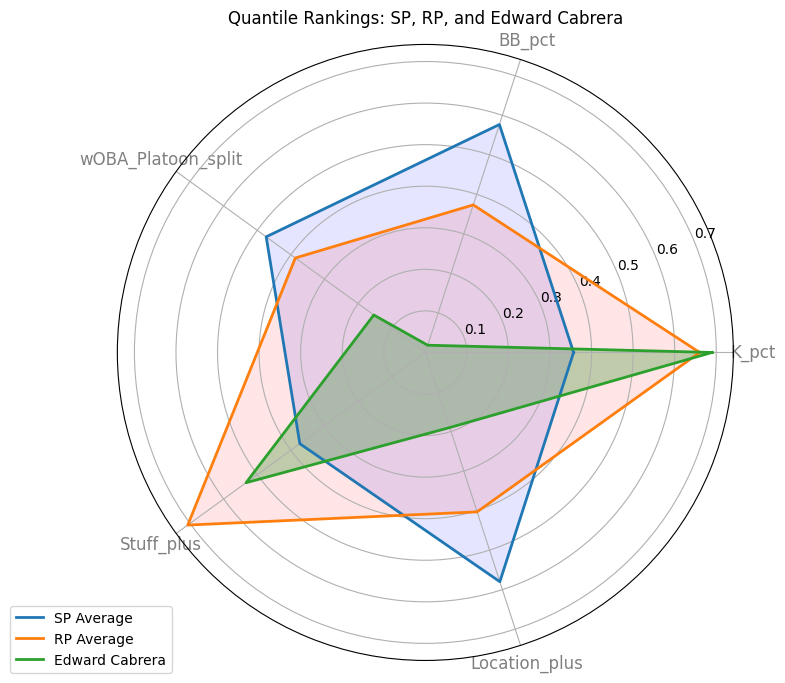

In [63]:
import matplotlib.pyplot as plt
import numpy as np

def create_radar_chart_with_pitcher(pitchers, year, stats_columns, pitcher_name):
    # First, calculate role quantiles
    role_quantiles = calculate_quantiles_for_roles(pitchers, year, stats_columns)

    # Next, get the specific pitcher's quantile rankings
    pitcher_quantiles = get_pitcher_quantile_rankings(pitchers, year, pitcher_name, stats_columns)

    # Continue with your existing setup for the radar chart...
    num_vars = len(stats_columns)
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]  # Complete the loop

    # Radar chart setup
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Extract SP, RP quantile values for plotting
    # Invert the values for BB_pct and Platoon_split
    sp_values = [role_quantiles['SP'][stat] if stat not in ['BB_pct', 'wOBA_Platoon_split'] else 1 - role_quantiles['SP'][stat] for stat in stats_columns] + [role_quantiles['SP'][stats_columns[0]]]
    rp_values = [role_quantiles['RP'][stat] if stat not in ['BB_pct', 'wOBA_Platoon_split'] else 1 - role_quantiles['RP'][stat] for stat in stats_columns] + [role_quantiles['RP'][stats_columns[0]]]

    # Extract the specific pitcher's quantile rankings for plotting
    # And invert the values for BB_pct and Platoon_split
    pitcher_values = [pitcher_quantiles[stat] if stat not in ['BB_pct', 'wOBA_Platoon_split'] else 1 - pitcher_quantiles[stat] for stat in stats_columns] + [pitcher_quantiles[stats_columns[0]]]

    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], stats_columns, color='grey', size=12)

    # Plot data for SP, RP, and the specific pitcher
    ax.plot(angles, sp_values, linewidth=2, linestyle='solid', label='SP Average')
    ax.fill(angles, sp_values, 'b', alpha=0.1)

    ax.plot(angles, rp_values, linewidth=2, linestyle='solid', label='RP Average')
    ax.fill(angles, rp_values, 'r', alpha=0.1)

    ax.plot(angles, pitcher_values, linewidth=2, linestyle='solid', label=pitcher_name)
    ax.fill(angles, pitcher_values, 'green', alpha=0.25)

    # Add legend and title
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title(f"Quantile Rankings: SP, RP, and {pitcher_name}")

    plt.show()


stats_columns = ['K_pct', 'BB_pct', 'wOBA_Platoon_split', 'Stuff_plus', 'Location_plus']

create_radar_chart_with_pitcher(pitchers, 2023, stats_columns, 'Edward Cabrera')

